In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [12]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


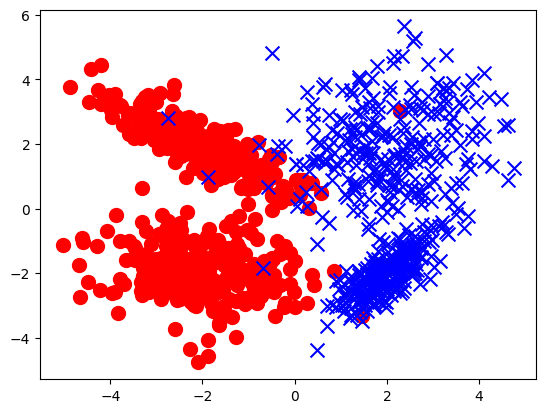

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [14]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

In [15]:
class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [16]:
logreg = LogReg()
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [17]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


In [18]:
y_pred_proba = logreg.predict_proba(X)

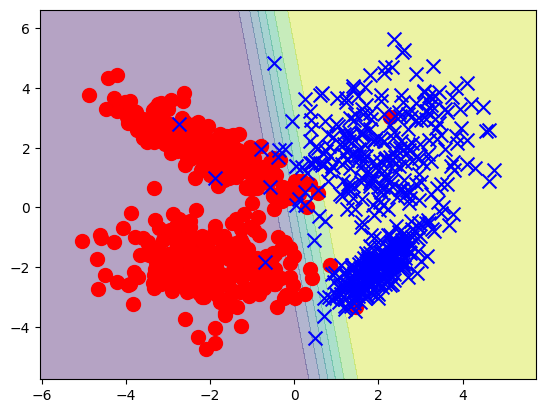

In [19]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [3]:
model = LogisticRegression()

In [4]:
model.fit(X, y)
y_pred_lr = model.predict(X)

In [5]:
model.score(X, y)

0.976

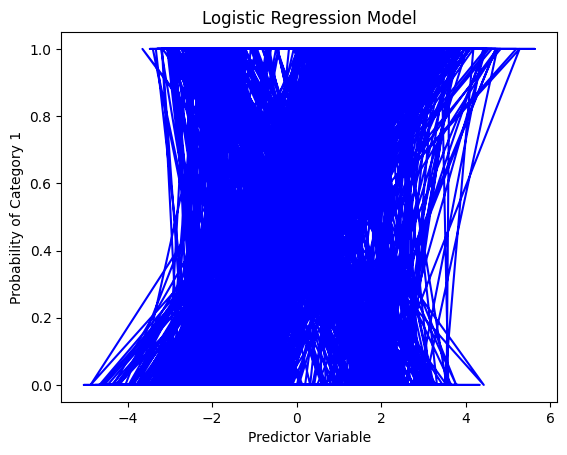

In [7]:
plt.plot(X, y_pred_lr, color='blue')
plt.xlabel('Predictor Variable')
plt.ylabel('Probability of Category 1')
plt.title('Logistic Regression Model')
plt.show()

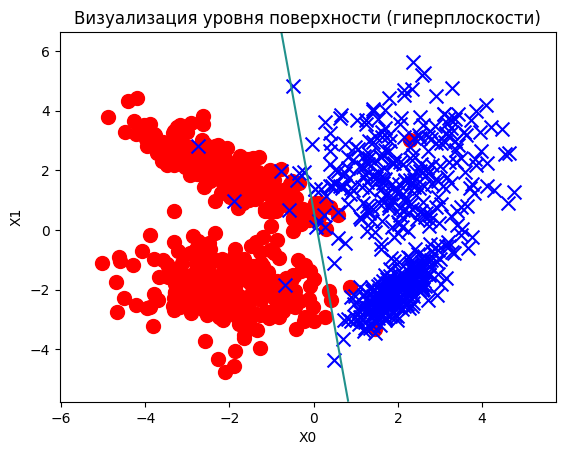

In [8]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100) # первый класс с 0 (о)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100) # второй класс с 1 (х)
X0 = np.linspace(X[:,0].min()-1,X[:,0].max()+1, X.shape[0]) # хранит двумерную сетку
X1 = np.linspace(X[:,1].min()-1,X[:,1].max()+1, X.shape[1])
X0_grid, X1_grid = np.meshgrid(X0, X1) # Сделали сетку
Z = model.intercept_[0] + model.coef_[0][0]*X0_grid + model.coef_[0][1]*X1_grid

plt.contour(X0_grid, X1_grid, Z, levels = 0)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Визуализация уровня поверхности (гиперплоскости)')
plt.show()

In [9]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       499
           1       0.97      0.98      0.98       501

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [10]:
model = LogisticRegression()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Скорость обучения 0.01: Точность модели = 0.97
Скорость обучения 0.1: Точность модели = 0.97
Скорость обучения 0.5: Точность модели = 0.97
Скорость обучения 1: Точность модели = 0.97
Скорость обучения 2: Точность модели = 0.97
Скорость обучения 5: Точность модели = 0.97
Скорость обучения 10: Точность модели = 0.98


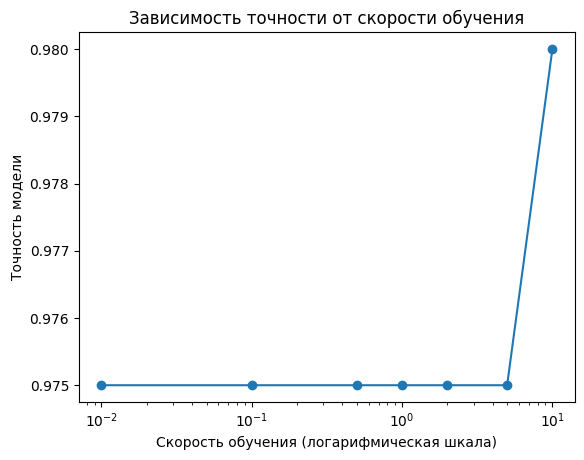

In [24]:
learning_rates = [0.01, 0.1, 0.5, 1, 2, 5, 10]

results = {}

for lr in learning_rates:
    model = LogisticRegression(solver='sag', max_iter=10000, C=1/lr)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[lr] = accuracy

for lr, accuracy in results.items():
    print(f'Скорость обучения {lr}: Точность модели = {accuracy:.2f}')

plt.figure()
plt.plot(learning_rates, [results[lr] for lr in learning_rates], marker='o')
plt.xscale('log')
plt.xlabel('Скорость обучения (логарифмическая шкала)')
plt.ylabel('Точность модели')
plt.title('Зависимость точности от скорости обучения')
plt.show()


3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

Скорость обучения 0.01: Точность модели = 0.97
Скорость обучения 0.1: Точность модели = 0.97
Скорость обучения 0.5: Точность модели = 0.97
Скорость обучения 1: Точность модели = 0.97
Скорость обучения 2: Точность модели = 0.97
Скорость обучения 5: Точность модели = 0.97
Скорость обучения 10: Точность модели = 0.98


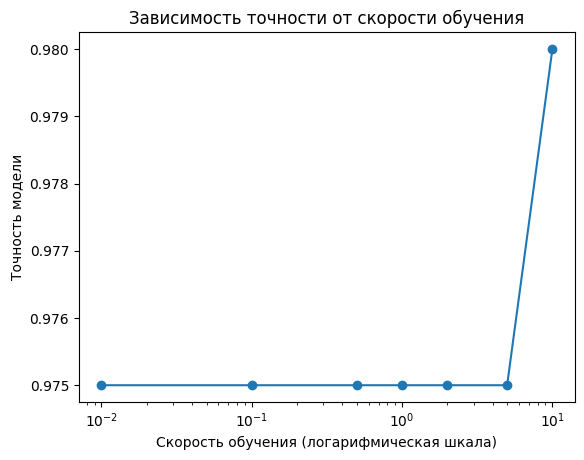

In [25]:
X = np.hstack((np.ones((X.shape[0], 1)), X))

learning_rates = [0.01, 0.1, 0.5, 1, 2, 5, 10]

results = {}

for lr in learning_rates:
    model = LogisticRegression(solver='sag', max_iter=10000, C=1/lr)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[lr] = accuracy

for lr, accuracy in results.items():
    print(f'Скорость обучения {lr}: Точность модели = {accuracy:.2f}')

plt.figure()
plt.plot(learning_rates, [results[lr] for lr in learning_rates], marker='o')
plt.xscale('log')
plt.xlabel('Скорость обучения (логарифмическая шкала)')
plt.ylabel('Точность модели')
plt.title('Зависимость точности от скорости обучения')
plt.show()

4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

Точность модели: 0.85
Матрица ошибок:
[[80 15]
 [14 91]]


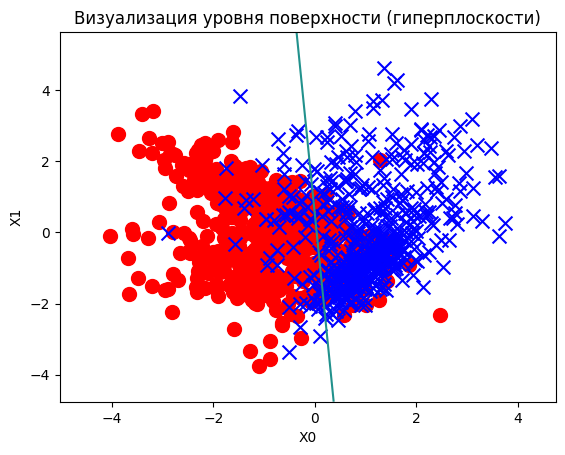

Точность модели: 0.97
Матрица ошибок:
[[ 92   3]
 [  2 103]]


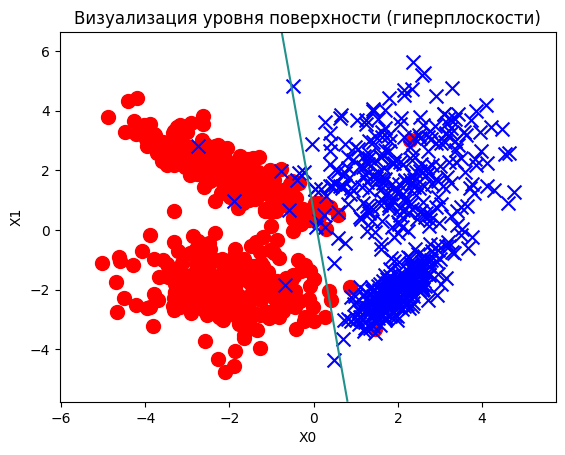

Точность модели: 1.00
Матрица ошибок:
[[ 95   0]
 [  0 105]]


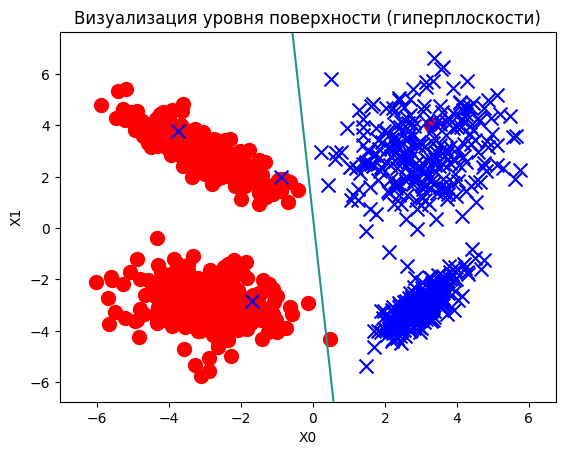

Точность модели: 1.00
Матрица ошибок:
[[ 95   0]
 [  0 105]]


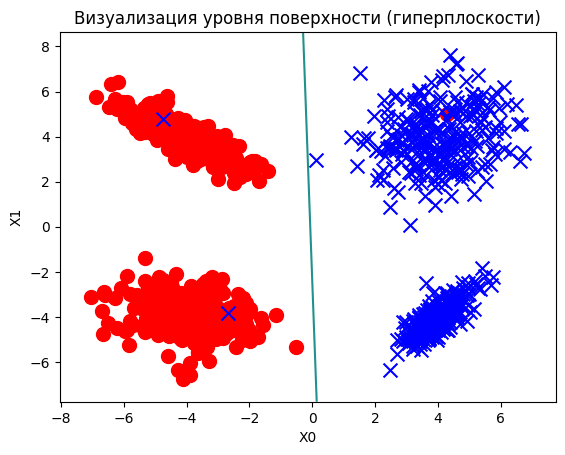

Точность модели: 1.00
Матрица ошибок:
[[ 95   0]
 [  0 105]]


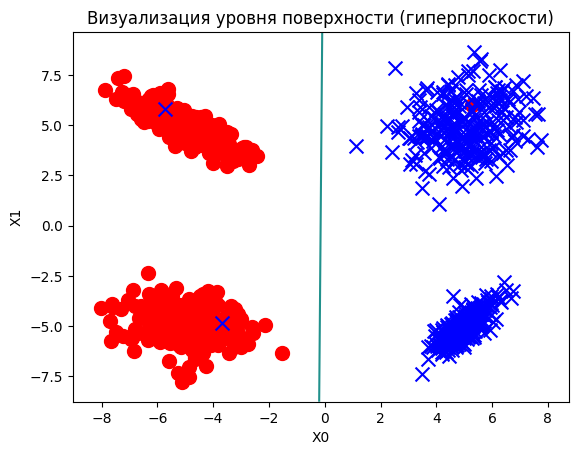

In [32]:
for c_s in range(1,6):
  X,y = make_classification (n_samples=1000,
                            n_features=2,
                            n_informative=2,
                            n_redundant=0,
                            n_classes=2,
                            class_sep=c_s,
                            random_state=1)

  # Разделяем данные на обучающий и тестовый наборы
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Обучаем модель логистической регрессии
  model = LogisticRegression()
  model.fit(X_train, y_train)

  # Делаем прогноз на тестовых данных
  y_pred = model.predict(X_test)

  # Вывод численных результатов
  accuracy = accuracy_score(y_test, y_pred)
  confusion = confusion_matrix(y_test, y_pred)

  print(f'Точность модели: {accuracy:.2f}')
  print('Матрица ошибок:')
  print(confusion)

  # Строим график данных и разделяющей гиперплоскости
  plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100) # первый класс с 0 (о)
  plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100) # второй класс с 1 (х)
  X0 = np.linspace(X[:,0].min()-1,X[:,0].max()+1, X.shape[0]) # хранит двумерную сетку
  X1 = np.linspace(X[:,1].min()-1,X[:,1].max()+1, X.shape[1])
  X0_grid, X1_grid = np.meshgrid(X0, X1) # Сделали сетку
  Z = model.intercept_[0] + model.coef_[0][0]*X0_grid + model.coef_[0][1]*X1_grid

  plt.contour(X0_grid, X1_grid, Z, levels = 0)
  plt.xlabel('X0')
  plt.ylabel('X1')
  plt.title('Визуализация уровня поверхности (гиперплоскости)')
  plt.show()

5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [34]:
from sklearn.datasets import make_classification

class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

# Генерация датасета
X, y = make_classification(n_samples=1000, n_features=1000)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
logreg = LogReg()
logreg.fit(X_train, y_train)

# Прогноз на тестовых данных
y_pred = logreg.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')

Точность модели: 0.69


6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [40]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

X,y = make_classification (n_samples=1000,
                            n_features=20,
                            n_informative=10,
                            n_redundant=0,
                            n_classes=5,
                            random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#clf = OneVsRestClassifier(SVC()).fit(X_test, y_test)

models = []
for class_label in range(5):

    model = LogisticRegression(solver='lbfgs')

    binary_labels = (y_train == class_label).astype(int)

    model.fit(X_train, binary_labels)

    models.append(model)

y_pred = np.array([model.predict(X_test) for model in models]).T

predicted_classes = np.argmax(y_pred, axis=1)

accuracy = np.mean(predicted_classes == y_test)
print(f'Точность модели: {accuracy:.2f}')

Точность модели: 0.41


In [42]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

X,y = make_classification (n_samples=1000,
                            n_features=20,
                            n_informative=10,
                            n_redundant=0,
                            n_classes=5,
                            random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = OneVsRestClassifier(SVC()).fit(X_test, y_test)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')

Точность модели: 0.96


7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression

In [44]:
from sklearn.linear_model import LogisticRegression

X,y = make_classification (n_samples=1000,
                            n_features=20,
                            n_informative=10,
                            n_redundant=0,
                            n_classes=5,
                            random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание объекта модели LogisticRegression
model = LogisticRegression()

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Применение модели к тестовым данным для получения предсказаний
y_pred_proba = model.predict_proba(X_test)

# Вывод значений вероятностей для каждого объекта принадлежать тому или иному классу
for i in range(len(y_pred_proba)):
    print(f"Объект {i+1}: класс 0 - {y_pred_proba[i][0]}, класс 1 - {y_pred_proba[i][1]}")

Объект 1: класс 0 - 0.2867275349512272, класс 1 - 0.01926487461709655
Объект 2: класс 0 - 0.10298818432808335, класс 1 - 0.0010339111984782262
Объект 3: класс 0 - 0.02069298562737573, класс 1 - 0.14405466497911332
Объект 4: класс 0 - 0.4357455384461001, класс 1 - 0.02106996256076855
Объект 5: класс 0 - 0.055034638392029975, класс 1 - 0.45995466513389377
Объект 6: класс 0 - 0.08832178088459472, класс 1 - 0.30174355523786117
Объект 7: класс 0 - 0.07962892054602269, класс 1 - 0.42298896862568547
Объект 8: класс 0 - 0.18308456848790397, класс 1 - 0.03575276030572963
Объект 9: класс 0 - 0.5480765751417075, класс 1 - 0.17304038116396767
Объект 10: класс 0 - 0.004284602535156729, класс 1 - 0.0018757199271026263
Объект 11: класс 0 - 0.025904395482531428, класс 1 - 0.7540165450397673
Объект 12: класс 0 - 0.03236899016750211, класс 1 - 0.11073378511944007
Объект 13: класс 0 - 0.563394575865079, класс 1 - 0.015177396376384378
Объект 14: класс 0 - 0.07119815605624978, класс 1 - 0.00087250386729763